In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pdb
from surprise import accuracy
from surprise import Reader, Dataset
from surprise.model_selection import KFold
from surprise import model_selection
from surprise import prediction_algorithms

In [2]:
#Question 1
movies_df = pd.read_csv('movies.csv')
ratings_df = pd.read_csv('ratings.csv')
print("Shape of movies dataframe " + str(movies_df.shape))
print("Shape of ratings dataframe " + str(ratings_df.shape))
movies_count = movies_df.shape[0]
users_count = ratings_df['userId'].value_counts().size
available_ratings_count = ratings_df.groupby(['userId', 'movieId']).ngroups
possible_ratings = movies_count * users_count
sparsity = available_ratings_count/possible_ratings
print("Number of movies " + str(movies_count))
print("Number of users " + str(users_count))
print("Number of available ratings " + str(available_ratings_count))
print("Number of possible ratings " + str(possible_ratings))
print("Sparsity of the ratings matrix is " + str(sparsity))

Shape of movies dataframe (9742, 3)
Shape of ratings dataframe (100836, 4)
Number of movies 9742
Number of users 610
Number of available ratings 100836
Number of possible ratings 5942620
Sparsity of the ratings matrix is 0.016968273253211548


Text(0, 0.5, 'Count')

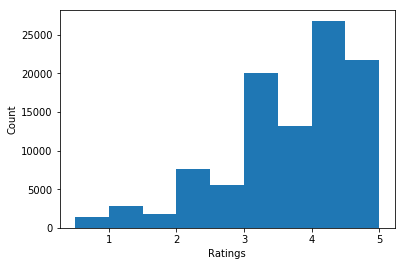

In [3]:
#Question 2
ratings_histogram = plt.hist(ratings_df['rating'], bins=np.linspace(0.5,5,10))
plt.xlabel('Ratings')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

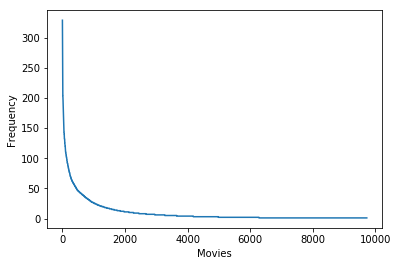

In [4]:
#Question 3
ratings_frequency = -np.sort(-ratings_df.groupby(['movieId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Movies')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

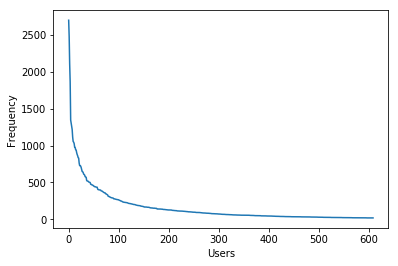

In [5]:
#Question 4
ratings_frequency = -np.sort(-ratings_df.groupby(['userId']).size())[::1]
plt.plot(ratings_frequency)
plt.xlabel('Users')
plt.ylabel('Frequency')

In [6]:
#Question 5


Text(0, 0.5, 'Count')

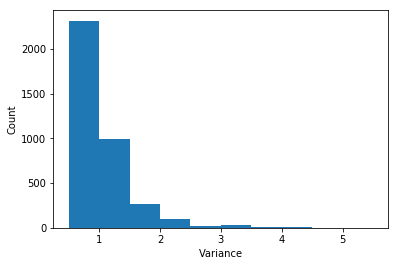

In [7]:
#Question 6 ----- check
ratings_frequency = ratings_df.groupby(['movieId'])
ratings_variance = ratings_frequency['rating'].agg(np.nanvar)
variance_histogram = plt.hist(ratings_variance,bins=np.arange(0.5,max(ratings_variance)+0.5,0.5).tolist())
plt.xlabel('Variance')
plt.ylabel('Count')

In [8]:
#Question 7
#Question 8
#Question 9

In [9]:
#Question 10  ----check mink or maxk
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file('ratings.csv', reader=reader)
sim_options = {'name': 'pearson',
               'user_based': True  #User-based
               }

In [34]:
rmse_values = []
mae_values = []
k_values = np.arange(2,101,2)
for k_temp in k_values:
    print("Model with k equal to " + str(k_temp))
    q10_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
    q10_model = model_selection.validation.cross_validate(q10_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    rmse_values.append(np.average(q10_model['test_rmse']))
    mae_values.append(np.average(q10_model['test_mae']))
    
    
    

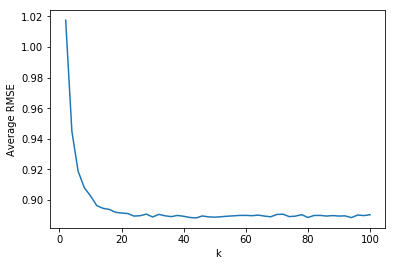

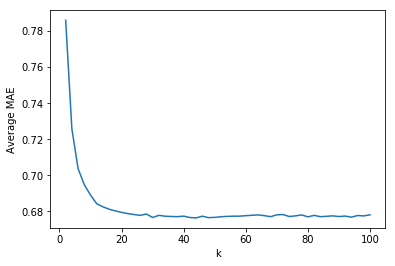

In [38]:
plt.plot(k_values,rmse_values)
plt.xlabel('k')
plt.ylabel('Average RMSE')
plt.show()
plt.plot(k_values,mae_values)
plt.xlabel('k')
plt.ylabel('Average MAE')
plt.show()

In [10]:
#Question 11
minimum_k = 20

In [25]:
#Question 12
def popular_movie_trimmer(testdata):
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]>2):
            new_testdata.append(testdata[index])
    return new_testdata
        

In [26]:
def knn_train(trimmer):
    q12_rmse_values = []
    q12_mae_values = []
    k_values = np.arange(2,101,2)
    for k_temp in k_values:
        print("Model with k equal to " + str(k_temp))
        kf = KFold(n_splits=10)
        q12_algo = prediction_algorithms.knns.KNNWithMeans(k=k_temp, sim_options=sim_options)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q12_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q12_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        q12_rmse_values.append(np.average(rmse_values_temp))
        q12_mae_values.append(np.average(mae_values_temp))
    plt.plot(k_values,q12_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Average RMSE')
    plt.show()
    plt.plot(k_values,q12_mae_values)
    plt.xlabel('k')
    plt.ylabel('Average MAE')
    plt.show()

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8776
RMSE: 0.8847
MAE:  0.6913
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8708
RMSE: 0.8946
MAE:  0.7036
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8681
RMSE: 0.8749
MAE:  0.6840
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8721
RMSE: 0.8881
MAE:  0.6965
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8710
RMSE: 0.8997
MAE:  0.7056
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

RMSE: 0.7533
MAE:  0.5912
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8734
RMSE: 0.7529
MAE:  0.5904
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8783
RMSE: 0.7477
MAE:  0.5918
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8745
RMSE: 0.7595
MAE:  0.5972
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8760
RMSE: 0.7439
MAE:  0.5868
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8736
RMSE: 0.7469
MAE:  0.5840
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7373
MAE:  0.5821
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8736
RMSE: 0.7285
MAE:  0.5764
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8688
RMSE: 0.7435
MAE:  0.5821
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8726
RMSE: 0.7393
MAE:  0.5812
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8734
RMSE: 0.7373
MAE:  0.5771
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8768
RMSE: 0.7338
MAE:  0.5803
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal test

RMSE: 0.7362
MAE:  0.5794
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8717
RMSE: 0.7319
MAE:  0.5756
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8710
RMSE: 0.7237
MAE:  0.5691
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8775
RMSE: 0.7432
MAE:  0.5829
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8723
RMSE: 0.7369
MAE:  0.5790
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8749
RMSE: 0.7271
MAE:  0.5760
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.7398
MAE:  0.5825
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8734
RMSE: 0.7312
MAE:  0.5746
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8742
RMSE: 0.7388
MAE:  0.5793
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8777
RMSE: 0.7325
MAE:  0.5759
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8701
RMSE: 0.7270
MAE:  0.5677
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8780
RMSE: 0.7345
MAE:  0.5797
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7252
MAE:  0.5696
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8689
RMSE: 0.7336
MAE:  0.5805
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8722
RMSE: 0.7334
MAE:  0.5770
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8763
RMSE: 0.7379
MAE:  0.5801
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8711
RMSE: 0.7358
MAE:  0.5787
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8762
RMSE: 0.7334
MAE:  0.5787
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7350
MAE:  0.5799
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8694
RMSE: 0.7213
MAE:  0.5708
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8697
RMSE: 0.7327
MAE:  0.5771
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8773
RMSE: 0.7273
MAE:  0.5726
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8729
RMSE: 0.7355
MAE:  0.5799
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8734
RMSE: 0.7404
MAE:  0.5819
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.7249
MAE:  0.5721
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8709
RMSE: 0.7359
MAE:  0.5770
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8718
RMSE: 0.7408
MAE:  0.5843
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8749
RMSE: 0.7309
MAE:  0.5731
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8742
RMSE: 0.7246
MAE:  0.5729
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8706
RMSE: 0.7345
MAE:  0.5783
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7324
MAE:  0.5745
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8760
RMSE: 0.7340
MAE:  0.5769
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8742
RMSE: 0.7372
MAE:  0.5801
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8735
RMSE: 0.7372
MAE:  0.5778
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8751
RMSE: 0.7206
MAE:  0.5644
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8736
RMSE: 0.7298
MAE:  0.5731
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7305
MAE:  0.5729
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8746
RMSE: 0.7325
MAE:  0.5773
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8730
RMSE: 0.7331
MAE:  0.5797
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8775
RMSE: 0.7389
MAE:  0.5793
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8715
RMSE: 0.7374
MAE:  0.5806
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8728
RMSE: 0.7345
MAE:  0.5800
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.7281
MAE:  0.5747
Model with k equal to 96
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8734
RMSE: 0.7394
MAE:  0.5814
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8713
RMSE: 0.7291
MAE:  0.5741
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8720
RMSE: 0.7308
MAE:  0.5757
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8708
RMSE: 0.7263
MAE:  0.5699
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8753
RMSE: 0.7368
MAE:  0.5790
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matr

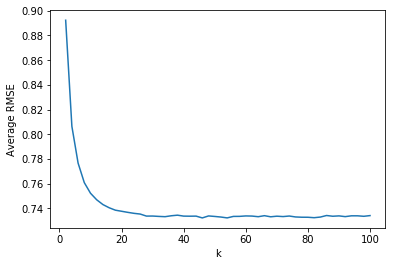

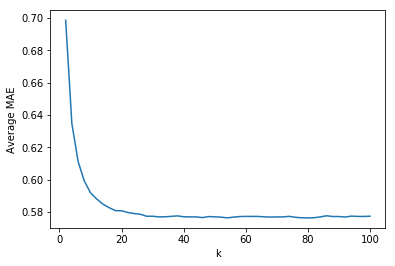

In [27]:
knn_train(popular_movie_trimmer)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8733
RMSE: 0.9083
MAE:  0.7131
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8676
RMSE: 0.8824
MAE:  0.6952
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8789
RMSE: 0.8809
MAE:  0.6872
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8784
RMSE: 0.8854
MAE:  0.6931
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8710
RMSE: 0.8990
MAE:  0.7032
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

RMSE: 0.7587
MAE:  0.5982
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8745
RMSE: 0.7498
MAE:  0.5925
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8746
RMSE: 0.7575
MAE:  0.5970
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8711
RMSE: 0.7511
MAE:  0.5918
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8742
RMSE: 0.7537
MAE:  0.5919
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8720
RMSE: 0.7516
MAE:  0.5928
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7476
MAE:  0.5903
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8703
RMSE: 0.7396
MAE:  0.5855
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8746
RMSE: 0.7471
MAE:  0.5829
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8742
RMSE: 0.7367
MAE:  0.5820
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8735
RMSE: 0.7348
MAE:  0.5761
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8755
RMSE: 0.7319
MAE:  0.5762
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal test

RMSE: 0.7312
MAE:  0.5774
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8753
RMSE: 0.7301
MAE:  0.5721
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8747
RMSE: 0.7184
MAE:  0.5648
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8758
RMSE: 0.7349
MAE:  0.5787
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8680
RMSE: 0.7356
MAE:  0.5816
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8752
RMSE: 0.7512
MAE:  0.5902
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.7471
MAE:  0.5844
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8794
RMSE: 0.7254
MAE:  0.5728
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8693
RMSE: 0.7308
MAE:  0.5761
Model with k equal to 40
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8755
RMSE: 0.7470
MAE:  0.5848
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8690
RMSE: 0.7311
MAE:  0.5759
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8771
RMSE: 0.7266
MAE:  0.5747
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7303
MAE:  0.5744
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8700
RMSE: 0.7431
MAE:  0.5840
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8777
RMSE: 0.7351
MAE:  0.5774
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8714
RMSE: 0.7361
MAE:  0.5811
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8700
RMSE: 0.7245
MAE:  0.5724
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8753
RMSE: 0.7240
MAE:  0.5651
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7319
MAE:  0.5752
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8785
RMSE: 0.7461
MAE:  0.5901
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8718
RMSE: 0.7338
MAE:  0.5772
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8719
RMSE: 0.7383
MAE:  0.5803
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8738
RMSE: 0.7361
MAE:  0.5769
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8730
RMSE: 0.7420
MAE:  0.5873
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.7346
MAE:  0.5765
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8707
RMSE: 0.7313
MAE:  0.5745
Model with k equal to 68
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8733
RMSE: 0.7262
MAE:  0.5693
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8761
RMSE: 0.7354
MAE:  0.5795
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8748
RMSE: 0.7378
MAE:  0.5785
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8777
RMSE: 0.7387
MAE:  0.5848
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7355
MAE:  0.5780
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8744
RMSE: 0.7311
MAE:  0.5731
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8745
RMSE: 0.7402
MAE:  0.5813
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8694
RMSE: 0.7411
MAE:  0.5837
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8756
RMSE: 0.7241
MAE:  0.5705
Model with k equal to 78
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8756
RMSE: 0.7357
MAE:  0.5792
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity mat

RMSE: 0.7406
MAE:  0.5808
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8763
RMSE: 0.7329
MAE:  0.5769
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8744
RMSE: 0.7272
MAE:  0.5702
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8737
RMSE: 0.7315
MAE:  0.5780
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8729
RMSE: 0.7363
MAE:  0.5784
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 8719
RMSE: 0.7277
MAE:  0.5711
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal tests

RMSE: 0.7317
MAE:  0.5762
Model with k equal to 96
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8740
RMSE: 0.7358
MAE:  0.5815
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8739
RMSE: 0.7401
MAE:  0.5822
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8721
RMSE: 0.7425
MAE:  0.5829
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8743
RMSE: 0.7353
MAE:  0.5800
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 8717
RMSE: 0.7324
MAE:  0.5761
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matr

In [13]:
#Question 13
def unpopular_movie_trimmer(testdata):
    new_testdata = []
    for index in range(len(testdata)):
        if(testdata[index][2]<=2):
            new_testdata.append(testdata[index])
    return new_testdata
knn_train(unpopular_movie_trimmer)

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 1335
RMSE: 1.5994
MAE:  1.3311
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 1322
RMSE: 1.6143
MAE:  1.3389
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 1441
RMSE: 1.6215
MAE:  1.3542
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 1360
RMSE: 1.5846
MAE:  1.3237
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 1339
RMSE: 1.6206
MAE:  1.3496
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset

KeyboardInterrupt: 

Model with k equal to 2
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.4176
MAE:  1.1477
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 122
RMSE: 1.5689
MAE:  1.2520
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 35
RMSE: 1.6814
MAE:  1.2334
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 73
RMSE: 1.5662
MAE:  1.2556
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 108
RMSE: 1.5880
MAE:  1.2391
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
S

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 76
RMSE: 1.3361
MAE:  1.0078
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 54
RMSE: 1.3450
MAE:  1.0444
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 98
RMSE: 1.4345
MAE:  1.1098
Model with k equal to 12
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 40
RMSE: 1.4890
MAE:  1.1021
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 68
RMSE: 1.3658
MAE:  1.0811
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 148
RMSE: 1.4010
MAE:  1.0422
-

Size of orginal testset 10084
Size of trimmed testset 106
RMSE: 1.4792
MAE:  1.1742
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 97
RMSE: 1.4407
MAE:  1.0938
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 87
RMSE: 1.4096
MAE:  1.1208
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 59
RMSE: 1.4848
MAE:  1.1399
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 85
RMSE: 1.4325
MAE:  1.1488
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 99
RMSE: 1.4031
MAE:  1.0973
Model with k equal to 22
----Pair 1
Computing the pearson si

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 64
RMSE: 1.4278
MAE:  1.1227
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 97
RMSE: 1.4736
MAE:  1.0803
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 87
RMSE: 1.3565
MAE:  1.0788
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 111
RMSE: 1.4874
MAE:  1.1651
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 68
RMSE: 1.3502
MAE:  1.0247
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 65
RMSE: 1.3337
MAE:  1.0700
----Pair 9
Computing the pe

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 124
RMSE: 1.4526
MAE:  1.1320
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 82
RMSE: 1.3873
MAE:  1.0569
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 113
RMSE: 1.3909
MAE:  1.0775
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 94
RMSE: 1.3972
MAE:  1.1156
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 89
RMSE: 1.3625
MAE:  1.0506
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 55
RMSE: 1.3850
MAE:  1.0270
----Pair 7
Computing the p

Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 104
RMSE: 1.4070
MAE:  1.0608
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 97
RMSE: 1.3466
MAE:  1.0630
Model with k equal to 50
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 108
RMSE: 1.3914
MAE:  1.0790
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 71
RMSE: 1.4584
MAE:  1.1674
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 103
RMSE: 1.4892
MAE:  1.1731
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of t

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 59
RMSE: 1.2552
MAE:  0.9594
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 81
RMSE: 1.4022
MAE:  1.0353
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 71
RMSE: 1.5192
MAE:  1.1214
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 107
RMSE: 1.4782
MAE:  1.1218
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 83
RMSE: 1.4285
MAE:  1.0782
Model with k equal to 60
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 70
RMSE: 1.3521
MAE:  1.0304
-

Size of orginal testset 10084
Size of trimmed testset 106
RMSE: 1.3429
MAE:  1.0275
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 49
RMSE: 1.4265
MAE:  1.0552
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 51
RMSE: 1.1559
MAE:  0.8892
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 116
RMSE: 1.3936
MAE:  1.0406
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 64
RMSE: 1.4606
MAE:  1.1239
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 103
RMSE: 1.4890
MAE:  1.1665
----Pair 9
Computing the pearson similarity matrix...
Done 

Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 117
RMSE: 1.3727
MAE:  1.0557
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 99
RMSE: 1.4093
MAE:  1.0609
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 155
RMSE: 1.4203
MAE:  1.0804
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 69
RMSE: 1.3211
MAE:  1.0727
----Pair 5
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 60
RMSE: 1.5443
MAE:  1.1720
----Pair 6
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 70
RMSE: 1.4672
MAE:  1.1094
----Pair 7
Computing the p

Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 149
RMSE: 1.3534
MAE:  1.0274
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 104
RMSE: 1.3467
MAE:  1.0399
Model with k equal to 88
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 91
RMSE: 1.4814
MAE:  1.1317
----Pair 2
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 62
RMSE: 1.4428
MAE:  1.0416
----Pair 3
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 82
RMSE: 1.3966
MAE:  1.1115
----Pair 4
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 58
RMSE: 1.2609
MAE:  0.9878


Size of orginal testset 10084
Size of trimmed testset 92
RMSE: 1.3588
MAE:  1.0984
----Pair 7
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 67
RMSE: 1.3510
MAE:  1.1038
----Pair 8
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 72
RMSE: 1.3142
MAE:  0.9653
----Pair 9
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 58
RMSE: 1.5094
MAE:  1.1996
----Pair 10
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10083
Size of trimmed testset 66
RMSE: 1.4178
MAE:  1.0271
Model with k equal to 98
----Pair 1
Computing the pearson similarity matrix...
Done computing similarity matrix.
Size of orginal testset 10084
Size of trimmed testset 71
RMSE: 1.4837
MAE:  1.1666
----Pair 2
Computing the pearson sim

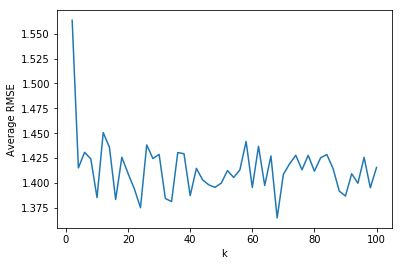

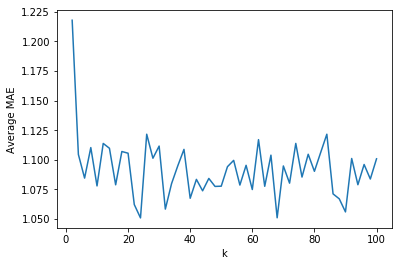

In [15]:
#Question 14
def high_variance_movie_trimmer(testdata):
    testdata_df = pd.DataFrame(testdata)
    testdata_df_group = testdata_df.groupby([1]).filter(lambda x: len(x) >= 5 and  np.nanvar(x[2])>=2)
    new_testdata = [tuple(x) for x in testdata_df_group.values]
    return new_testdata
knn_train(high_variance_movie_trimmer)

In [ ]:
#Question 15



Model with factor equal to 2
Model with factor equal to 4
Model with factor equal to 6
Model with factor equal to 8
Model with factor equal to 10
Model with factor equal to 12
Model with factor equal to 14
Model with factor equal to 16
Model with factor equal to 18
Model with factor equal to 20
Model with factor equal to 22
Model with factor equal to 24
Model with factor equal to 26
Model with factor equal to 28
Model with factor equal to 30
Model with factor equal to 32
Model with factor equal to 34
Model with factor equal to 36
Model with factor equal to 38
Model with factor equal to 40
Model with factor equal to 42
Model with factor equal to 44
Model with factor equal to 46
Model with factor equal to 48
Model with factor equal to 50
Model with factor equal to 52
Model with factor equal to 54
Model with factor equal to 56
Model with factor equal to 58
Model with factor equal to 60
Model with factor equal to 62
Model with factor equal to 64
Model with factor equal to 66
Model with fac

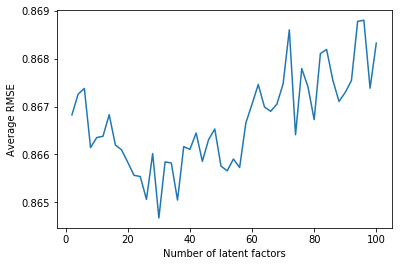

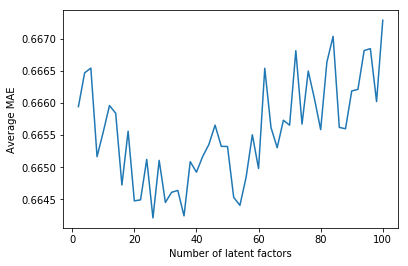

In [16]:
#Question 16
q16_rmse_values = []
q16_mae_values = []
factor_values = np.arange(2,101,2)
for factor_temp in factor_values:
    print("Model with factor equal to " + str(factor_temp))
    q16_algo = prediction_algorithms.matrix_factorization.SVD(n_factors=factor_temp)
    q16_model = model_selection.validation.cross_validate(q16_algo, data, cv=10, return_train_measures=True, n_jobs=-1)
    q16_rmse_values.append(np.average(q16_model['test_rmse']))
    q16_mae_values.append(np.average(q16_model['test_mae']))
plt.plot(factor_values,q16_rmse_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average RMSE')
plt.show()
plt.plot(factor_values,q16_mae_values)
plt.xlabel('Number of latent factors')
plt.ylabel('Average MAE')
plt.show()

In [21]:
#Question 17
def nnmf_train(trimmer):
    nnmf_rmse_values = []
    nnmf_mae_values = []
    factor_values = np.arange(2,101,2)
    for factor_temp in factor_values:
        print("Model with factor equal to " + str(factor_temp))
        kf = KFold(n_splits=10)
        q16_algo = prediction_algorithms.matrix_factorization.SVD(n_factors=factor_temp)
        rmse_values_temp = []
        mae_values_temp = []
        pair_no = 1
        for trainset, testset in kf.split(data):
            print("----Pair " + str(pair_no))
            pair_no = pair_no + 1
            q16_algo.fit(trainset)
            trimmed_testset = trimmer(testset)
            print("Size of orginal testset " + str(len(testset)))
            print("Size of trimmed testset " + str(len(trimmed_testset)))
            predictions = q16_algo.test(trimmed_testset)
            rmse_values_temp.append(accuracy.rmse(predictions))
            mae_values_temp.append(accuracy.mae(predictions))
        nnmf_rmse_values.append(np.average(rmse_values_temp))
        nnmf_mae_values.append(np.average(mae_values_temp))
    plt.plot(factor_values,nnmf_rmse_values)
    plt.xlabel('k')
    plt.ylabel('Number of latent factors')
    plt.show()
    plt.plot(factor_values,nnmf_mae_values)
    plt.xlabel('Number of latent factors')
    plt.ylabel('Average MAE')
    plt.show()

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 8664
RMSE: 0.6948
MAE:  0.5518
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 8687
RMSE: 0.6940
MAE:  0.5519
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 8746
RMSE: 0.6979
MAE:  0.5537
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 8740
RMSE: 0.6870
MAE:  0.5446
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 8729
RMSE: 0.6922
MAE:  0.5514
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 8780
RMSE: 0.6907
MAE:  0.5495
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 8765
RMSE: 0.6897
MAE:  0.5482
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 8716
RMSE: 0.6867
MAE:  0.5424
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 8760
RMSE: 0.7050
MAE:  0.5583
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 8726
RMSE: 0.7027
MAE:  0.5598
Model with

----Pair 4
Size of orginal testset 10084
Size of trimmed testset 8768
RMSE: 0.6855
MAE:  0.5470
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 8700
RMSE: 0.6961
MAE:  0.5514
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 8675
RMSE: 0.6945
MAE:  0.5515
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 8739
RMSE: 0.6980
MAE:  0.5536
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 8730
RMSE: 0.6903
MAE:  0.5460
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 8760
RMSE: 0.6914
MAE:  0.5513
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 8775
RMSE: 0.7004
MAE:  0.5566
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 8746
RMSE: 0.6993
MAE:  0.5525
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 8745
RMSE: 0.6981
MAE:  0.5539
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 8721
RMSE: 0.7036
MAE:  0.5584
----Pair 

----Pair 7
Size of orginal testset 10083
Size of trimmed testset 8681
RMSE: 0.6968
MAE:  0.5555
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 8722
RMSE: 0.7094
MAE:  0.5593
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 8754
RMSE: 0.7044
MAE:  0.5614
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 8727
RMSE: 0.6875
MAE:  0.5464
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 8689
RMSE: 0.7015
MAE:  0.5570
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 8771
RMSE: 0.6965
MAE:  0.5503
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 8694
RMSE: 0.6940
MAE:  0.5516
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 8716
RMSE: 0.7048
MAE:  0.5569
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 8691
RMSE: 0.6885
MAE:  0.5448
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 8731
RMSE: 0.7008
MAE:  0.5534
----Pair 

----Pair 10
Size of orginal testset 10083
Size of trimmed testset 8773
RMSE: 0.6881
MAE:  0.5466
Model with factor equal to 52
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 8719
RMSE: 0.6872
MAE:  0.5472
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 8698
RMSE: 0.7029
MAE:  0.5561
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 8704
RMSE: 0.6979
MAE:  0.5539
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 8767
RMSE: 0.6906
MAE:  0.5477
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 8740
RMSE: 0.7026
MAE:  0.5553
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 8751
RMSE: 0.6917
MAE:  0.5465
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 8738
RMSE: 0.6960
MAE:  0.5531
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 8762
RMSE: 0.6958
MAE:  0.5524
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 8713
RMSE: 0.6919
MAE:  0.5504
----Pair 

Size of orginal testset 10084
Size of trimmed testset 8769
RMSE: 0.6952
MAE:  0.5520
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 8745
RMSE: 0.7088
MAE:  0.5591
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 8757
RMSE: 0.7009
MAE:  0.5578
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 8709
RMSE: 0.6960
MAE:  0.5514
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 8710
RMSE: 0.6986
MAE:  0.5541
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 8682
RMSE: 0.6972
MAE:  0.5522
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 8687
RMSE: 0.6895
MAE:  0.5495
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 8733
RMSE: 0.6977
MAE:  0.5532
Model with factor equal to 70
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 8763
RMSE: 0.7048
MAE:  0.5611
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 8710
RMSE: 0.7018
MAE:  0.5570
----Pair 3
Size of o

Size of orginal testset 10084
Size of trimmed testset 8723
RMSE: 0.7018
MAE:  0.5574
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 8737
RMSE: 0.7075
MAE:  0.5613
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 8759
RMSE: 0.6978
MAE:  0.5532
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 8668
RMSE: 0.6962
MAE:  0.5492
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 8753
RMSE: 0.6897
MAE:  0.5466
Model with factor equal to 86
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 8725
RMSE: 0.6997
MAE:  0.5564
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 8759
RMSE: 0.6993
MAE:  0.5549
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 8700
RMSE: 0.6920
MAE:  0.5503
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 8733
RMSE: 0.6909
MAE:  0.5498
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 8717
RMSE: 0.6999
MAE:  0.5564
----Pair 6
Size of o

----Pair 9
Size of orginal testset 10083
Size of trimmed testset 8710
RMSE: 0.7041
MAE:  0.5600
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 8757
RMSE: 0.7006
MAE:  0.5554


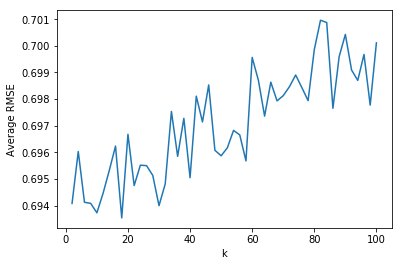

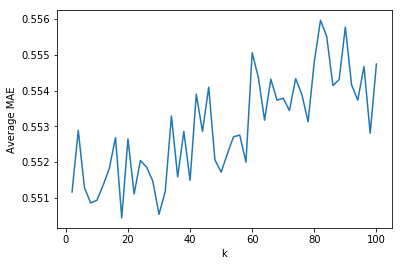

In [22]:
nnmf_train(popular_movie_trimmer)

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 1347
RMSE: 1.5853
MAE:  1.4198
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 1357
RMSE: 1.5613
MAE:  1.3963
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 1364
RMSE: 1.6243
MAE:  1.4514
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 1339
RMSE: 1.5452
MAE:  1.3733
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 1316
RMSE: 1.5964
MAE:  1.4122
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 1288
RMSE: 1.5679
MAE:  1.3941
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 1369
RMSE: 1.5616
MAE:  1.3943
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 1395
RMSE: 1.5792
MAE:  1.4152
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 1370
RMSE: 1.5675
MAE:  1.3807
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 1378
RMSE: 1.5825
MAE:  1.4105
Model with

Size of orginal testset 10084
Size of trimmed testset 1357
RMSE: 1.5784
MAE:  1.4016
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 1347
RMSE: 1.5841
MAE:  1.4185
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 1391
RMSE: 1.5543
MAE:  1.3893
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 1359
RMSE: 1.5588
MAE:  1.3819
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 1298
RMSE: 1.5913
MAE:  1.4102
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 1394
RMSE: 1.5889
MAE:  1.4080
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 1305
RMSE: 1.5707
MAE:  1.3988
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 1403
RMSE: 1.5805
MAE:  1.4054
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 1324
RMSE: 1.5431
MAE:  1.3725
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 1319
RMSE: 1.5838
MAE:  1.4059
----Pair 4
Size of o

Size of orginal testset 10083
Size of trimmed testset 1357
RMSE: 1.5873
MAE:  1.4114
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 1338
RMSE: 1.5810
MAE:  1.4016
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 1399
RMSE: 1.5777
MAE:  1.3959
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 1372
RMSE: 1.5765
MAE:  1.3944
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 1347
RMSE: 1.5691
MAE:  1.3804
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 1356
RMSE: 1.5930
MAE:  1.4106
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 1405
RMSE: 1.5627
MAE:  1.3843
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 1402
RMSE: 1.5354
MAE:  1.3772
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 1337
RMSE: 1.5751
MAE:  1.3895
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 1388
RMSE: 1.5752
MAE:  1.3886
----Pair 7
Size of o

Size of orginal testset 10083
Size of trimmed testset 1374
RMSE: 1.5873
MAE:  1.4104
Model with factor equal to 52
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 1395
RMSE: 1.5621
MAE:  1.3877
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 1312
RMSE: 1.5720
MAE:  1.3869
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 1367
RMSE: 1.5820
MAE:  1.3987
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 1358
RMSE: 1.6144
MAE:  1.4456
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 1366
RMSE: 1.5562
MAE:  1.3874
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 1372
RMSE: 1.5853
MAE:  1.3994
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 1350
RMSE: 1.5521
MAE:  1.3733
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 1278
RMSE: 1.5483
MAE:  1.3785
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 1342
RMSE: 1.5655
MAE:  1.3786
----Pair 10
Size of o

Size of orginal testset 10084
Size of trimmed testset 1376
RMSE: 1.5508
MAE:  1.3732
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 1334
RMSE: 1.5515
MAE:  1.3696
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 1353
RMSE: 1.5450
MAE:  1.3737
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 1370
RMSE: 1.5936
MAE:  1.4104
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 1352
RMSE: 1.6084
MAE:  1.4394
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 1277
RMSE: 1.5581
MAE:  1.3690
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 1373
RMSE: 1.5865
MAE:  1.4118
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 1340
RMSE: 1.5546
MAE:  1.3818
Model with factor equal to 70
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 1289
RMSE: 1.5549
MAE:  1.3708
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 1337
RMSE: 1.5818
MAE:  1.3862
----Pair 3
Size of o

----Pair 6
Size of orginal testset 10084
Size of trimmed testset 1379
RMSE: 1.5563
MAE:  1.3837
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 1339
RMSE: 1.5998
MAE:  1.4237
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 1365
RMSE: 1.5670
MAE:  1.3891
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 1319
RMSE: 1.5590
MAE:  1.3820
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 1372
RMSE: 1.5814
MAE:  1.3886
Model with factor equal to 86
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 1381
RMSE: 1.5819
MAE:  1.4030
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 1363
RMSE: 1.5872
MAE:  1.3985
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 1377
RMSE: 1.5742
MAE:  1.3936
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 1322
RMSE: 1.5602
MAE:  1.3869
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 1349
RMSE: 1.5606
MAE:  1.3799
----Pair 

Size of orginal testset 10083
Size of trimmed testset 1305
RMSE: 1.5926
MAE:  1.4147
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 1342
RMSE: 1.5709
MAE:  1.3905


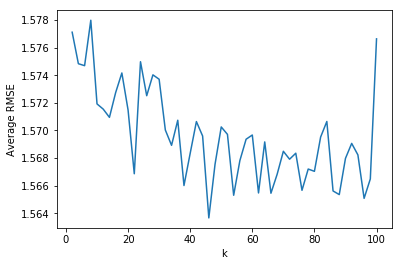

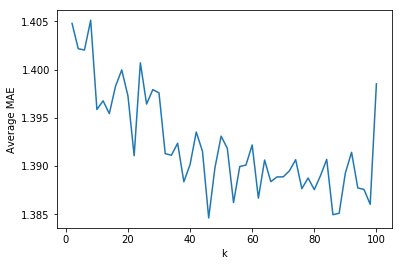

In [23]:
#Question 18
nnmf_train(unpopular_movie_trimmer)

Model with factor equal to 2
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 114
RMSE: 1.3500
MAE:  1.0853
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 77
RMSE: 1.4578
MAE:  1.1394
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 126
RMSE: 1.4531
MAE:  1.1601
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 76
RMSE: 1.3385
MAE:  1.0941
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 96
RMSE: 1.4318
MAE:  1.1071
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 57
RMSE: 1.5118
MAE:  1.1234
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 107
RMSE: 1.3918
MAE:  1.1138
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 81
RMSE: 1.4244
MAE:  1.0678
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 59
RMSE: 1.3816
MAE:  1.1041
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 92
RMSE: 1.3717
MAE:  1.0872
Model with factor equal to 

Size of orginal testset 10084
Size of trimmed testset 71
RMSE: 1.4054
MAE:  1.0771
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 117
RMSE: 1.3779
MAE:  1.0793
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 86
RMSE: 1.3706
MAE:  1.1236
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 83
RMSE: 1.4518
MAE:  1.1773
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 72
RMSE: 1.3650
MAE:  1.1046
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 74
RMSE: 1.3717
MAE:  1.1103
Model with factor equal to 20
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 90
RMSE: 1.4250
MAE:  1.1087
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 144
RMSE: 1.3261
MAE:  1.0923
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 135
RMSE: 1.3798
MAE:  1.0965
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 73
RMSE: 1.4204
MAE:  1.1125
----Pair 5
Size of orginal testset 10

Size of orginal testset 10083
Size of trimmed testset 135
RMSE: 1.4215
MAE:  1.1134
Model with factor equal to 36
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 149
RMSE: 1.4273
MAE:  1.1230
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 89
RMSE: 1.2882
MAE:  0.9514
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 67
RMSE: 1.3529
MAE:  1.0492
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 84
RMSE: 1.4756
MAE:  1.1844
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 124
RMSE: 1.4505
MAE:  1.1242
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 117
RMSE: 1.4380
MAE:  1.0825
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 65
RMSE: 1.4428
MAE:  1.1200
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 125
RMSE: 1.4370
MAE:  1.1559
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 87
RMSE: 1.3601
MAE:  1.1173
----Pair 10
Size of orginal testset 

Size of orginal testset 10084
Size of trimmed testset 85
RMSE: 1.4070
MAE:  1.1182
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 120
RMSE: 1.5077
MAE:  1.1336
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 116
RMSE: 1.3089
MAE:  0.9818
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 97
RMSE: 1.4927
MAE:  1.1650
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 64
RMSE: 1.3597
MAE:  1.0716
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 134
RMSE: 1.3548
MAE:  1.0840
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 61
RMSE: 1.4131
MAE:  1.1202
Model with factor equal to 54
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 130
RMSE: 1.3639
MAE:  1.0720
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 86
RMSE: 1.4125
MAE:  1.1061
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 95
RMSE: 1.3712
MAE:  1.0775
----Pair 4
Size of orginal testset 1

Size of orginal testset 10083
Size of trimmed testset 71
RMSE: 1.4193
MAE:  1.1041
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 81
RMSE: 1.4726
MAE:  1.2182
Model with factor equal to 70
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 116
RMSE: 1.4601
MAE:  1.1203
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 53
RMSE: 1.4178
MAE:  1.0432
----Pair 3
Size of orginal testset 10084
Size of trimmed testset 141
RMSE: 1.3966
MAE:  1.0859
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 108
RMSE: 1.3096
MAE:  1.0611
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 95
RMSE: 1.4317
MAE:  1.1340
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 50
RMSE: 1.2779
MAE:  0.9954
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 66
RMSE: 1.4168
MAE:  1.1808
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 107
RMSE: 1.4218
MAE:  1.1139
----Pair 9
Size of orginal testset 1

Size of orginal testset 10084
Size of trimmed testset 75
RMSE: 1.3873
MAE:  1.0914
----Pair 4
Size of orginal testset 10084
Size of trimmed testset 67
RMSE: 1.4954
MAE:  1.1149
----Pair 5
Size of orginal testset 10084
Size of trimmed testset 105
RMSE: 1.3863
MAE:  1.0761
----Pair 6
Size of orginal testset 10084
Size of trimmed testset 94
RMSE: 1.3331
MAE:  1.0258
----Pair 7
Size of orginal testset 10083
Size of trimmed testset 71
RMSE: 1.4892
MAE:  1.1666
----Pair 8
Size of orginal testset 10083
Size of trimmed testset 143
RMSE: 1.3638
MAE:  1.1401
----Pair 9
Size of orginal testset 10083
Size of trimmed testset 124
RMSE: 1.2501
MAE:  1.0149
----Pair 10
Size of orginal testset 10083
Size of trimmed testset 69
RMSE: 1.4332
MAE:  1.1600
Model with factor equal to 88
----Pair 1
Size of orginal testset 10084
Size of trimmed testset 96
RMSE: 1.3193
MAE:  1.0257
----Pair 2
Size of orginal testset 10084
Size of trimmed testset 26
RMSE: 1.4213
MAE:  1.1774
----Pair 3
Size of orginal testset 10

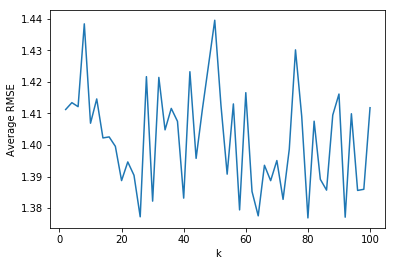

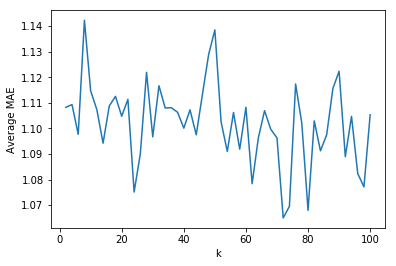

In [24]:
#Question 19
nnmf_train(high_variance_movie_trimmer)

951